<a href="https://colab.research.google.com/github/vaishnavir33/Mini-Project/blob/main/Mini_Project(Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#DATASET
!pip install bing-image-downloader

In [55]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
from bing_image_downloader import downloader
downloader.download("pizza",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://media.timeout.com/images/103437036/image.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/P-Ojv_1veCg/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ytimg.com/vi/CxZM0PM77Us/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Eataly_Las_Vegas_-_Feb_2019_-_Stierch_12.jpg/1200px-Eataly_Las_Vegas_-_Feb_2019_-_Stierch_12.jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Eataly_Las_Vegas_-_Feb_2019_-_Stierch_12.jpg/1200px-Eataly_Las_Vegas_-_Feb_2019_-_Stierch_12.jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Eataly_Las_Vegas_-_Feb_2019_-_Stierch_12.jpg/1200px-Eataly_Las_Vegas_-_Feb_2019_-_Stierch_12.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #4 from ht

In [ ]:
downloader.download("penguin",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island–Chinstrap_penguin_(Pygoscelis_antarctica)_04.jpg/1200px-South_Shetland-2016-Deception_Island–Chinstrap_penguin_(Pygoscelis_antarctica)_04.jpg
[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island–Chinstrap_penguin_(Pygoscelis_antarctica)_04.jpg/1200px-South_Shetland-2016-Deception_Island–Chinstrap_penguin_(Pygoscelis_antarctica)_04.jpg
[!] Error:: 'ascii' codec can't encode character '\u2013' in position 70: ordinal not in range(128)
[%] Downloading Image #1 from http://www.animalspot.net/wp-content/uploads/2017/08/Baby-Penguin.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/01/16/10/emperor-penguin.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.w

In [ ]:
downloader.download("red rose",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://ghk.h-cdn.co/assets/17/01/red-roses.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://orchidflowers.files.wordpress.com/2011/03/small_red_rose.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://scopeblog.stanford.edu/wp-content/uploads/2017/02/roses.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://2.bp.blogspot.com/-MjtyX0aVBTQ/Uah5Si6T4XI/AAAAAAAAH5o/AGlwArfI8MM/s1600/red+rose.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.atco.co.uk/wordpress/wp-content/uploads/2018/02/red-rose.jpg
[!] Issue getting: https://www.atco.co.uk/wordpress/wp-content/uploads/2018/02/red-rose.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #5 from https://www.gardeningknowhow.com/wp-content/uploads/2019/11/red-rose.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://memoriesaremadeofthisblog.files.wordpress.com/2012/06/re

In [ ]:
#PREPROCESS DATA
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread

In [ ]:
target = [] 
images = [] # Matrix Format
flat_data = [] 
DATADIR = '/content/images'
CATEGORIES = ['pizza','penguin','red rose']

for i in CATEGORIES:
  class_num = CATEGORIES.index(i) 
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) 
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
    #print(img_resized.shape)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
len(flat_data[0])

67500

In [ ]:
150*150*3


67500

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

<BarContainer object of 3 artists>

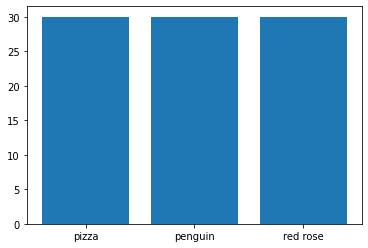

In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
             ]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       2, 0, 0, 0, 1])

In [ ]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_pred,y_test)

0.9629629629629629

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 8,  0,  1],
       [ 0, 11,  0],
       [ 0,  0,  7]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00        11
           2       0.88      1.00      0.93         7

    accuracy                           0.96        27
   macro avg       0.96      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



In [ ]:
#Save the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))


In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter the urlhttps://images.indulgexpress.com/uploads/user/imagelibrary/2018/11/2/original/285A5419.JPG
(2240, 3360, 3)
 PREDICTED OUTPUT : pizza


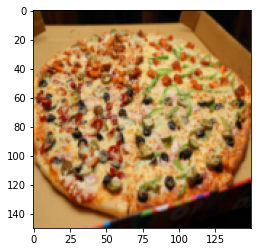

In [ ]:
#Testing a new image
flat_data = []
url = input('Enter the url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT : {y_out}')

Enter the urlhttps://images.unsplash.com/photo-1561238160-3fd50893667f?ixid=MXwxMjA3fDB8MHxzZWFyY2h8NHx8cmVkJTIwcm9zZXxlbnwwfHwwfA%3D%3D&ixlib=rb-1.2.1&w=1000&q=80.jpg
(1500, 1000, 3)
 PREDICTED OUTPUT : red rose


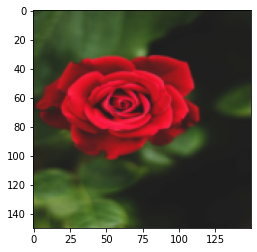

In [ ]:
flat_data = []
url = input('Enter the url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT : {y_out}')

Enter the urlhttps://lh3.googleusercontent.com/proxy/d3IiqrWnoNAupOyqho6dAbqkjFrPFbR4sLdxOXwDvxF9yyyYFCOgUpbWjXTQ-boSSAbiKb2E9oxX7cLRlOimDrucCMDXUx9MqFWlWfdiolp-_RUoro24aM413dYFIIhwXAZQRM-EvAyzTz4JjLXbB_oCbQdZh4Z-YQAf
(307, 512, 3)
 PREDICTED OUTPUT : penguin


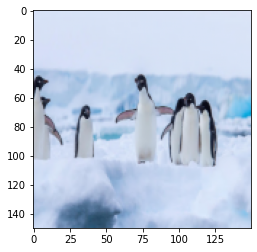

In [ ]:
flat_data = []
url = input('Enter the url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT : {y_out}')

In [ ]:
#Deployment
